In [73]:
import pandas as pd
from typing import List, Dict, Tuple
from dataclasses import dataclass
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

# 한글 폰트 설정 (macOS의 경우)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
# IPython 출력 시 monospace 폰트 경고 방지를 위한 설정
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython.core.pylabtools')

# 데이터 로드
df: pd.DataFrame = pd.read_csv("../ab_clicks_practice.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2000 non-null   int64 
 1   group    2000 non-null   object
 2   clicked  2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [74]:
df.describe()

,user_id,clicked
count,2000.000000,2000.000000
mean,1000.500000,0.093000
std,577.494589,0.290505
min,1.000000,0.000000
25%,500.750000,0.000000
50%,1000.500000,0.000000
75%,1500.250000,0.000000
max,2000.000000,1.000000


In [75]:
# 그룹별 데이터 필터링
group_a: pd.DataFrame = df[df['group'] == 'A']
group_b: pd.DataFrame = df[df['group'] == 'B']

print(f"A그룹: {len(group_a)}명")
print(f"B그룹: {len(group_b)}명")

A그룹: 1008명
B그룹: 992명


In [76]:
# 그룹별 표본 개수 계산
@dataclass
class GroupStats:
    """그룹별 통계 정보를 담는 데이터 클래스"""
    count: int
    clicks: int
    click_rate: float
    click_rate_percent: float
    
    def __post_init__(self) -> None:
        """클릭률 백분률 자동 계산"""
        self.click_rate_percent = self.click_rate * 100

# 그룹별 데이터 추출
group_list: List[str] = list(df['group'])
click_list: List[int] = list(df['clicked'])

# 그룹별 개수 계산
count_a: int = sum(1 for g in group_list if g == 'A')
count_b: int = sum(1 for g in group_list if g == 'B')

print(f"A그룹 표본 개수: {count_a}개")
print(f"B그룹 표본 개수: {count_b}개")
print(f"전체 표본 개수: {count_a + count_b}개")

A그룹 표본 개수: 1008개
B그룹 표본 개수: 992개
전체 표본 개수: 2000개


In [77]:
# 그룹별 클릭 횟수 계산
k_a: int = sum(1 for i in range(len(group_list)) 
               if group_list[i] == 'A' and click_list[i] == 1)
k_b: int = sum(1 for i in range(len(group_list)) 
               if group_list[i] == 'B' and click_list[i] == 1)

print(f"A그룹의 총 클릭 횟수: {k_a}회")
print(f"B그룹의 총 클릭 횟수: {k_b}회")

A그룹의 총 클릭 횟수: 88회
B그룹의 총 클릭 횟수: 98회


In [82]:
# 그룹별 클릭률 계산 및 통계 객체 생성
p_a: float = k_a / count_a if count_a > 0 else 0.0
p_b: float = k_b / count_b if count_b > 0 else 0.0

# 통계 객체 생성
stats_a: GroupStats = GroupStats(count=count_a, clicks=k_a, click_rate=p_a, click_rate_percent=0.0)
stats_b: GroupStats = GroupStats(count=count_b, clicks=k_b, click_rate=p_b, click_rate_percent=0.0)

# 비교 통계 계산
click_rate_diff: float = p_b - p_a
improvement_rate: float = (click_rate_diff / p_a * 100) if p_a > 0 else 0.0

print(f"A그룹 클릭률: {p_a:.4f} ({stats_a.click_rate_percent:.2f}%) - 전체 {count_a}명 중 {k_a}명 클릭")
print(f"B그룹 클릭률: {p_b:.4f} ({stats_b.click_rate_percent:.2f}%) - 전체 {count_b}명 중 {k_b}명 클릭")
print(f"\n클릭률 차이: {click_rate_diff:.4f} ({click_rate_diff * 100:.2f}%)")
print(f"개선율: {improvement_rate:.2f}%")

A그룹 클릭률: 0.0873 (8.73%) - 전체 1008명 중 88명 클릭
B그룹 클릭률: 0.0988 (9.88%) - 전체 992명 중 98명 클릭

클릭률 차이: 0.0115 (1.15%)
개선율: 13.16%


/var/folders/ln/hfrywxn12hj1s4bdp2_kc7k40000gn/T/ipykernel_22864/382860064.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['A그룹', 'B그룹'], fontsize=14, fontweight='bold')
/Users/tylersong/Desktop/workspace/learn/python/offline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tylersong/Desktop/workspace/learn/python/offline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tylersong/Desktop/workspace/learn/python/offline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans Mono.
  fig.c

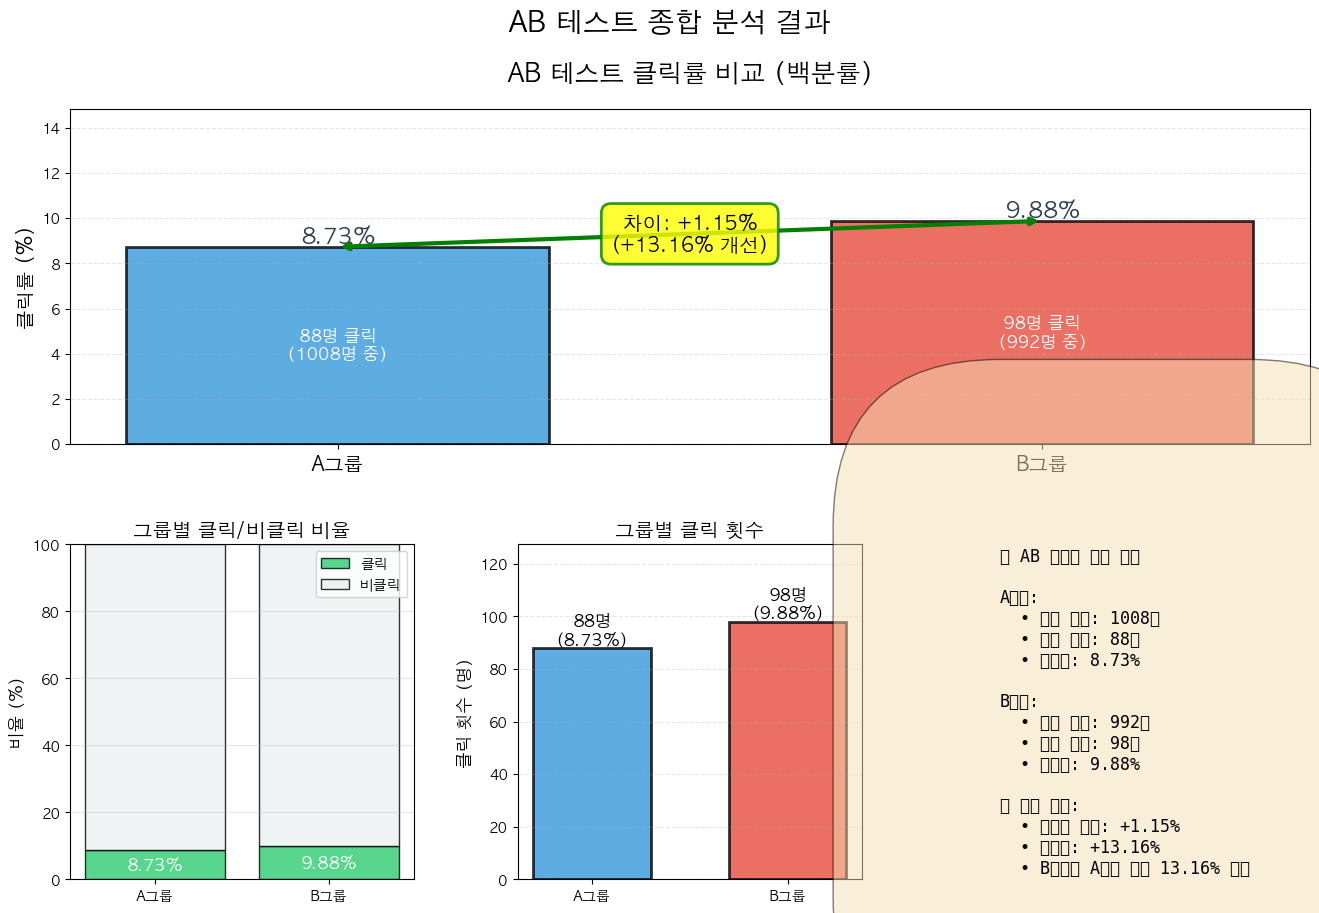


📊 AB 테스트 결과 (백분률)
A그룹 클릭률: 8.73% (88명 / 1008명)
B그룹 클릭률: 9.88% (98명 / 992명)

클릭률 차이: +1.15%
개선율: +13.16%


/var/folders/ln/hfrywxn12hj1s4bdp2_kc7k40000gn/T/ipykernel_22864/382860064.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['A그룹', 'B그룹'], fontsize=14, fontweight='bold')


<Figure size 640x480 with 0 Axes>


📊 AB 테스트 결과 (백분률)
A그룹 클릭률: 8.73% (88명 / 1008명)
B그룹 클릭률: 9.88% (98명 / 992명)

클릭률 차이: +1.15%
개선율: +13.16%


In [83]:
# 시각화 함수 정의
def create_comprehensive_dashboard(
    stats_a: GroupStats,
    stats_b: GroupStats,
    click_rate_diff: float,
    improvement_rate: float
) -> None:
    """AB 테스트 결과 종합 대시보드 생성"""
    fig = plt.figure(figsize=(16, 10))
    gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # 백분률 계산
    p_a_percent: float = stats_a.click_rate_percent
    p_b_percent: float = stats_b.click_rate_percent
    diff_percent: float = click_rate_diff * 100
    
    # 1-1. 그룹별 클릭률 비교 (메인 차트)
    ax1 = fig.add_subplot(gs[0, :])
    bars = ax1.bar(['A그룹', 'B그룹'], [p_a_percent, p_b_percent], 
                   color=['#3498db', '#e74c3c'], alpha=0.8, width=0.6, 
                   edgecolor='black', linewidth=2)
    ax1.set_title('AB 테스트 클릭률 비교 (백분률)', fontsize=18, fontweight='bold', pad=20)
    ax1.set_ylabel('클릭률 (%)', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, max(p_a_percent, p_b_percent) * 1.5)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['A그룹', 'B그룹'], fontsize=14, fontweight='bold')
    
    # 값 표시
    ax1.text(0, p_a_percent, f'{p_a_percent:.2f}%', ha='center', va='bottom', 
             fontsize=16, fontweight='bold', color='#2c3e50')
    ax1.text(0, p_a_percent/2, f'{stats_a.clicks}명 클릭\n({stats_a.count}명 중)', 
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
    ax1.text(1, p_b_percent, f'{p_b_percent:.2f}%', ha='center', va='bottom',
             fontsize=16, fontweight='bold', color='#2c3e50')
    ax1.text(1, p_b_percent/2, f'{stats_b.clicks}명 클릭\n({stats_b.count}명 중)', 
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
    # 차이 표시
    if click_rate_diff > 0:
        ax1.annotate('', xy=(1, p_b_percent), xytext=(0, p_a_percent),
                    arrowprops=dict(arrowstyle='<->', color='green', lw=3))
        ax1.text(0.5, (p_a_percent + p_b_percent) / 2, 
                f'차이: +{diff_percent:.2f}%\n(+{improvement_rate:.2f}% 개선)', 
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8, 
                         edgecolor='green', lw=2))
    
    # 1-2. 그룹별 클릭/비클릭 비율 (스택 바)
    ax2 = fig.add_subplot(gs[1, 0])
    groups = ['A그룹', 'B그룹']
    clicked_pct = [p_a_percent, p_b_percent]
    not_clicked_pct = [100 - p_a_percent, 100 - p_b_percent]
    
    ax2.bar(groups, clicked_pct, label=f'클릭', 
            color='#2ecc71', alpha=0.8, edgecolor='black')
    ax2.bar(groups, not_clicked_pct, bottom=clicked_pct, 
            label=f'비클릭', 
            color='#ecf0f1', alpha=0.8, edgecolor='black')
    ax2.set_title('그룹별 클릭/비클릭 비율', fontsize=14, fontweight='bold')
    ax2.set_ylabel('비율 (%)', fontsize=12)
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper right', fontsize=10)
    ax2.grid(axis='y', alpha=0.3)
    
    # 값 표시
    ax2.text(0, p_a_percent/2, f'{p_a_percent:.2f}%', ha='center', va='center',
             fontsize=12, fontweight='bold', color='white')
    ax2.text(1, p_b_percent/2, f'{p_b_percent:.2f}%', ha='center', va='center',
             fontsize=12, fontweight='bold', color='white')
    
    # 1-3. 그룹별 클릭 횟수 비교
    ax3 = fig.add_subplot(gs[1, 1])
    bars3 = ax3.bar(groups, [stats_a.clicks, stats_b.clicks], 
                    color=['#3498db', '#e74c3c'], alpha=0.8, 
                    width=0.6, edgecolor='black', linewidth=2)
    ax3.set_title('그룹별 클릭 횟수', fontsize=14, fontweight='bold')
    ax3.set_ylabel('클릭 횟수 (명)', fontsize=12)
    ax3.set_ylim(0, max(stats_a.clicks, stats_b.clicks) * 1.3)
    ax3.grid(axis='y', alpha=0.3, linestyle='--')
    
    # 값 표시
    ax3.text(0, stats_a.clicks, f'{stats_a.clicks}명\n({p_a_percent:.2f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax3.text(1, stats_b.clicks, f'{stats_b.clicks}명\n({p_b_percent:.2f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # 1-4. 요약 정보
    ax4 = fig.add_subplot(gs[1, 2])
    ax4.axis('off')
    
    summary_text = f"""
📊 AB 테스트 결과 요약

A그룹:
  • 표본 크기: {stats_a.count}명
  • 클릭 횟수: {stats_a.clicks}명
  • 클릭률: {p_a_percent:.2f}%

B그룹:
  • 표본 크기: {stats_b.count}명
  • 클릭 횟수: {stats_b.clicks}명
  • 클릭률: {p_b_percent:.2f}%

📈 성과 비교:
  • 클릭률 차이: +{diff_percent:.2f}%
  • 개선율: +{improvement_rate:.2f}%
  • B그룹이 A그룹 대비 {improvement_rate:.2f}% 개선
"""
    
    ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5, pad=10))
    
    plt.suptitle('AB 테스트 종합 분석 결과', fontsize=20, fontweight='bold', y=0.98)
    plt.show()
    
    # 수치 출력
    print(f"\n{'='*50}")
    print("📊 AB 테스트 결과 (백분률)")
    print(f"{'='*50}")
    print(f"A그룹 클릭률: {p_a_percent:.2f}% ({stats_a.clicks}명 / {stats_a.count}명)")
    print(f"B그룹 클릭률: {p_b_percent:.2f}% ({stats_b.clicks}명 / {stats_b.count}명)")
    print(f"\n클릭률 차이: +{diff_percent:.2f}%")
    print(f"개선율: +{improvement_rate:.2f}%")
    print(f"{'='*50}")

# 대시보드 생성
create_comprehensive_dashboard(stats_a, stats_b, click_rate_diff, improvement_rate)

# 1-1. 그룹별 클릭률 비교 (메인 차트 - 큰 사이즈)
ax1 = fig.add_subplot(gs[0, :])
bars = ax1.bar(['A그룹', 'B그룹'], [p_a_percent, p_b_percent], 
               color=['#3498db', '#e74c3c'], alpha=0.8, width=0.6, edgecolor='black', linewidth=2)
ax1.set_title('AB 테스트 클릭률 비교 (백분률)', fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('클릭률 (%)', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(p_a_percent, p_b_percent) * 1.5)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_xticklabels(['A그룹', 'B그룹'], fontsize=14, fontweight='bold')

# 막대 위에 값 표시 (백분률)
ax1.text(0, p_a_percent, f'{p_a_percent:.2f}%', ha='center', va='bottom', 
         fontsize=16, fontweight='bold', color='#2c3e50')
ax1.text(0, p_a_percent/2, f'{k_a}명 클릭\n({count_a}명 중)', ha='center', va='center',
         fontsize=12, color='white', fontweight='bold')

ax1.text(1, p_b_percent, f'{p_b_percent:.2f}%', ha='center', va='bottom',
         fontsize=16, fontweight='bold', color='#2c3e50')
ax1.text(1, p_b_percent/2, f'{k_b}명 클릭\n({count_b}명 중)', ha='center', va='center',
         fontsize=12, color='white', fontweight='bold')

# 차이 표시
if click_rate_diff > 0:
    diff_percent = click_rate_diff * 100
    ax1.annotate('', xy=(1, p_b_percent), xytext=(0, p_a_percent),
                arrowprops=dict(arrowstyle='<->', color='green', lw=3))
    ax1.text(0.5, (p_a_percent + p_b_percent) / 2, 
            f'차이: +{diff_percent:.2f}%\n(+{improvement_rate:.2f}% 개선)', 
            ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8, edgecolor='green', lw=2))

# 1-2. 그룹별 클릭/비클릭 비율 (스택 바)
ax2 = fig.add_subplot(gs[1, 0])
groups = ['A그룹', 'B그룹']
clicked_pct = [p_a_percent, p_b_percent]
not_clicked_pct = [100 - p_a_percent, 100 - p_b_percent]

ax2.bar(groups, clicked_pct, label=f'클릭 ({p_a_percent:.2f}% / {p_b_percent:.2f}%)', 
        color='#2ecc71', alpha=0.8, edgecolor='black')
ax2.bar(groups, not_clicked_pct, bottom=clicked_pct, 
        label=f'비클릭 ({100-p_a_percent:.2f}% / {100-p_b_percent:.2f}%)', 
        color='#ecf0f1', alpha=0.8, edgecolor='black')
ax2.set_title('그룹별 클릭/비클릭 비율', fontsize=14, fontweight='bold')
ax2.set_ylabel('비율 (%)', fontsize=12)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 값 표시
ax2.text(0, p_a_percent/2, f'{p_a_percent:.2f}%', ha='center', va='center',
         fontsize=12, fontweight='bold', color='white')
ax2.text(1, p_b_percent/2, f'{p_b_percent:.2f}%', ha='center', va='center',
         fontsize=12, fontweight='bold', color='white')

# 1-3. 그룹별 클릭 횟수 비교
ax3 = fig.add_subplot(gs[1, 1])
bars3 = ax3.bar(groups, [k_a, k_b], color=['#3498db', '#e74c3c'], alpha=0.8, 
                width=0.6, edgecolor='black', linewidth=2)
ax3.set_title('그룹별 클릭 횟수', fontsize=14, fontweight='bold')
ax3.set_ylabel('클릭 횟수 (명)', fontsize=12)
ax3.set_ylim(0, max(k_a, k_b) * 1.3)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 값 표시
ax3.text(0, k_a, f'{k_a}명\n({p_a_percent:.2f}%)', ha='center', va='bottom',
         fontsize=12, fontweight='bold')
ax3.text(1, k_b, f'{k_b}명\n({p_b_percent:.2f}%)', ha='center', va='bottom',
         fontsize=12, fontweight='bold')

# 1-4. 그룹별 표본 크기 및 클릭률 요약
ax4 = fig.add_subplot(gs[1, 2])
ax4.axis('off')

# 요약 정보 텍스트
summary_text = f"""
📊 AB 테스트 결과 요약

A그룹:
  • 표본 크기: {count_a}명
  • 클릭 횟수: {k_a}명
  • 클릭률: {p_a_percent:.2f}%

B그룹:
  • 표본 크기: {count_b}명
  • 클릭 횟수: {k_b}명
  • 클릭률: {p_b_percent:.2f}%

📈 성과 비교:
  • 클릭률 차이: +{click_rate_diff*100:.2f}%
  • 개선율: +{improvement_rate:.2f}%
  • B그룹이 A그룹 대비 {improvement_rate:.2f}% 개선
"""

ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5, pad=10),
         family='monospace')

plt.suptitle('AB 테스트 종합 분석 결과', fontsize=20, fontweight='bold', y=0.98)
plt.show()

# 수치 출력
print(f"\n{'='*50}")
print("📊 AB 테스트 결과 (백분률)")
print(f"{'='*50}")
print(f"A그룹 클릭률: {p_a_percent:.2f}% ({k_a}명 / {count_a}명)")
print(f"B그룹 클릭률: {p_b_percent:.2f}% ({k_b}명 / {count_b}명)")
print(f"\n클릭률 차이: +{click_rate_diff*100:.2f}%")
print(f"개선율: +{improvement_rate:.2f}%")
print(f"{'='*50}")

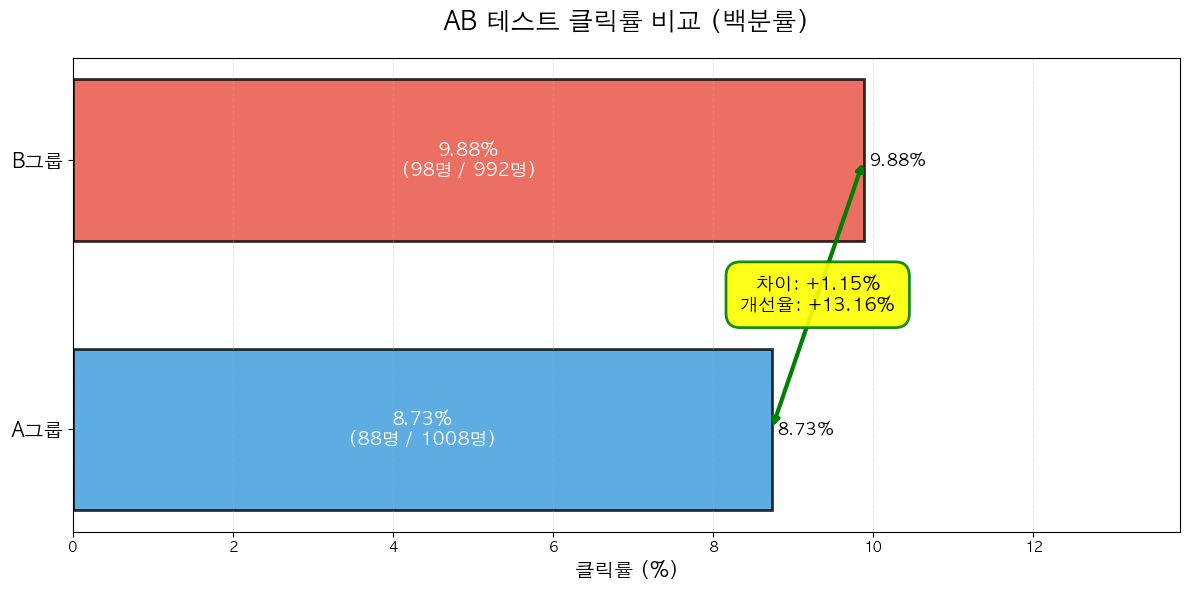


📈 클릭률 비교 결과 (백분률)
A그룹: 8.73% (88명 / 1008명)
B그룹: 9.88% (98명 / 992명)

클릭률 차이: +1.15%
개선율: +13.16%


In [80]:
# 2. 클릭률 비교 - 수평 막대 그래프
def create_horizontal_comparison(
    stats_a: GroupStats,
    stats_b: GroupStats,
    click_rate_diff: float,
    improvement_rate: float
) -> None:
    """수평 막대 그래프로 클릭률 비교"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 백분률 계산
    p_a_percent: float = stats_a.click_rate_percent
    p_b_percent: float = stats_b.click_rate_percent
    diff_percent: float = click_rate_diff * 100
    
    # 수평 막대 그래프
    y_pos = [0, 1]
    bars = ax.barh(y_pos, [p_a_percent, p_b_percent], 
                   color=['#3498db', '#e74c3c'], alpha=0.8, height=0.6, 
                   edgecolor='black', linewidth=2)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(['A그룹', 'B그룹'], fontsize=14, fontweight='bold')
    ax.set_xlabel('클릭률 (%)', fontsize=14, fontweight='bold')
    ax.set_title('AB 테스트 클릭률 비교 (백분률)', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlim(0, max(p_a_percent, p_b_percent) * 1.4)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # 막대 안에 값 표시
    ax.text(p_a_percent/2, 0, f'{p_a_percent:.2f}%\n({stats_a.clicks}명 / {stats_a.count}명)', 
            ha='center', va='center', fontsize=13, fontweight='bold', color='white')
    ax.text(p_b_percent/2, 1, f'{p_b_percent:.2f}%\n({stats_b.clicks}명 / {stats_b.count}명)', 
            ha='center', va='center', fontsize=13, fontweight='bold', color='white')
    
    # 막대 끝에 값 표시
    ax.text(p_a_percent, 0, f' {p_a_percent:.2f}%', 
            ha='left', va='center', fontsize=12, fontweight='bold')
    ax.text(p_b_percent, 1, f' {p_b_percent:.2f}%', 
            ha='left', va='center', fontsize=12, fontweight='bold')
    
    # 차이 표시
    if click_rate_diff > 0:
        ax.annotate('', xy=(p_b_percent, 1), xytext=(p_a_percent, 0),
                    arrowprops=dict(arrowstyle='<->', color='green', lw=3))
        mid_x = (p_a_percent + p_b_percent) / 2
        ax.text(mid_x, 0.5, f'차이: +{diff_percent:.2f}%\n개선율: +{improvement_rate:.2f}%', 
                ha='center', va='center', fontsize=13, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.9, 
                         edgecolor='green', lw=2))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*60}")
    print("📈 클릭률 비교 결과 (백분률)")
    print(f"{'='*60}")
    print(f"A그룹: {p_a_percent:.2f}% ({stats_a.clicks}명 / {stats_a.count}명)")
    print(f"B그룹: {p_b_percent:.2f}% ({stats_b.clicks}명 / {stats_b.count}명)")
    print(f"\n클릭률 차이: +{diff_percent:.2f}%")
    print(f"개선율: +{improvement_rate:.2f}%")
    print(f"{'='*60}")

# 수평 막대 그래프 생성
create_horizontal_comparison(stats_a, stats_b, click_rate_diff, improvement_rate)

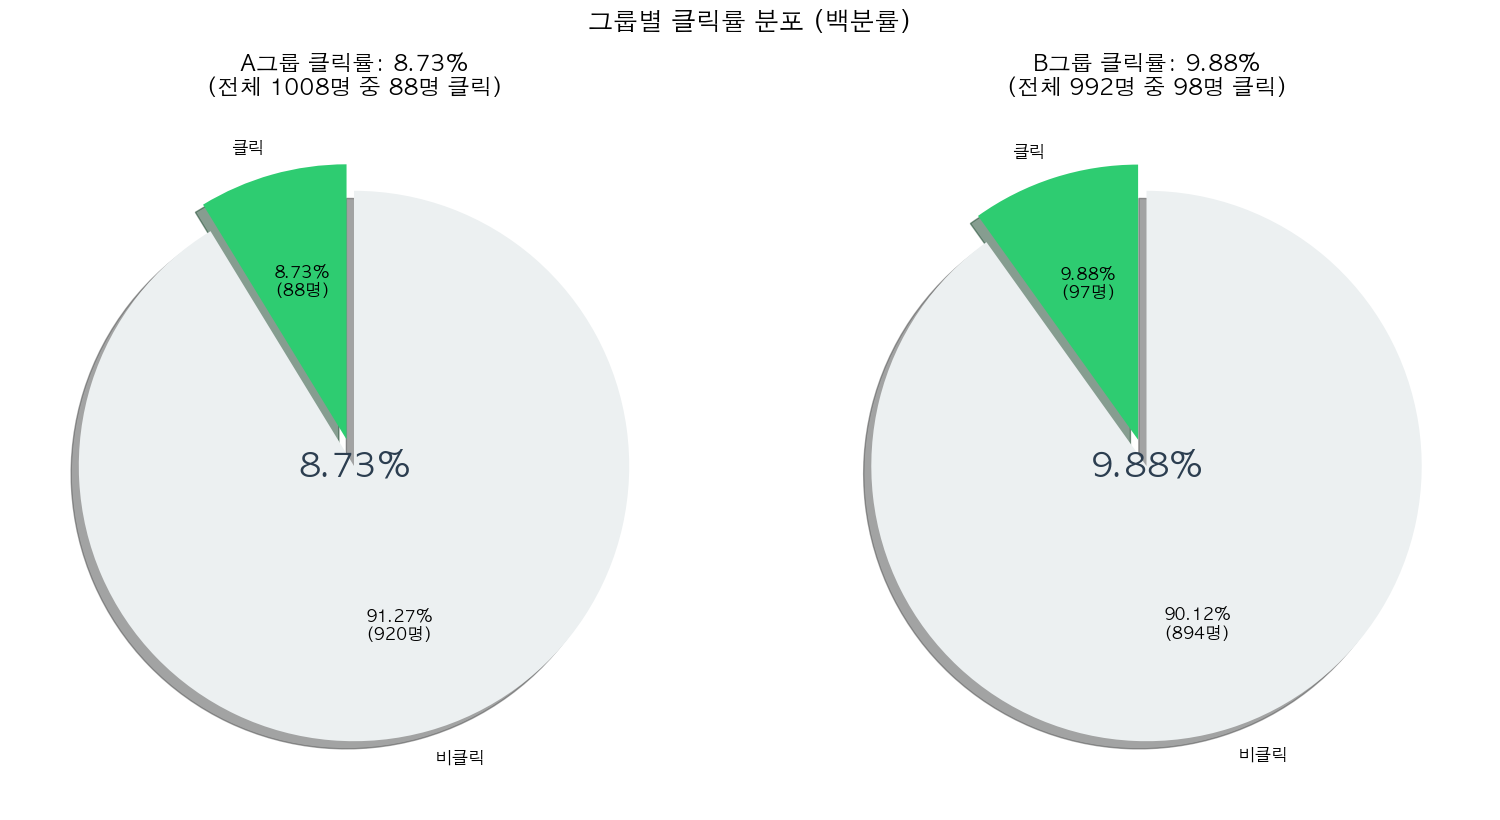


📊 그룹별 상세 통계 (백분률)

[A그룹]
  전체 인원: 1008명
  클릭 인원: 88명 (8.73%)
  비클릭 인원: 920명 (91.27%)

[B그룹]
  전체 인원: 992명
  클릭 인원: 98명 (9.88%)
  비클릭 인원: 894명 (90.12%)


In [81]:
# 3. 그룹별 클릭률 파이 차트
def create_pie_charts(
    stats_a: GroupStats,
    stats_b: GroupStats
) -> None:
    """그룹별 클릭률 파이 차트 생성"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # 백분률 계산
    p_a_percent: float = stats_a.click_rate_percent
    p_b_percent: float = stats_b.click_rate_percent
    
    # A그룹 파이 차트
    a_clicked: int = stats_a.clicks
    a_not_clicked: int = stats_a.count - stats_a.clicks
    wedges1, texts1, autotexts1 = axes[0].pie(
        [a_clicked, a_not_clicked], 
        labels=['클릭', '비클릭'], 
        autopct=lambda pct: f'{pct:.2f}%\n({int(pct/100*stats_a.count):.0f}명)' if pct > 5 else '',
        startangle=90,
        colors=['#2ecc71', '#ecf0f1'],
        explode=(0.1, 0),
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )
    axes[0].set_title(f'A그룹 클릭률: {p_a_percent:.2f}%\n(전체 {stats_a.count}명 중 {stats_a.clicks}명 클릭)', 
                      fontsize=16, fontweight='bold', pad=20)
    
    # 클릭 부분에 큰 텍스트 추가
    axes[0].text(0, 0, f'{p_a_percent:.2f}%', ha='center', va='center',
                fontsize=24, fontweight='bold', color='#2c3e50')
    
    # B그룹 파이 차트
    b_clicked: int = stats_b.clicks
    b_not_clicked: int = stats_b.count - stats_b.clicks
    wedges2, texts2, autotexts2 = axes[1].pie(
        [b_clicked, b_not_clicked], 
        labels=['클릭', '비클릭'], 
        autopct=lambda pct: f'{pct:.2f}%\n({int(pct/100*stats_b.count):.0f}명)' if pct > 5 else '',
        startangle=90,
        colors=['#2ecc71', '#ecf0f1'],
        explode=(0.1, 0),
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )
    axes[1].set_title(f'B그룹 클릭률: {p_b_percent:.2f}%\n(전체 {stats_b.count}명 중 {stats_b.clicks}명 클릭)', 
                      fontsize=16, fontweight='bold', pad=20)
    
    # 클릭 부분에 큰 텍스트 추가
    axes[1].text(0, 0, f'{p_b_percent:.2f}%', ha='center', va='center',
                fontsize=24, fontweight='bold', color='#2c3e50')
    
    plt.suptitle('그룹별 클릭률 분포 (백분률)', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 상세 정보 출력
    print(f"\n{'='*60}")
    print("📊 그룹별 상세 통계 (백분률)")
    print(f"{'='*60}")
    print(f"\n[A그룹]")
    print(f"  전체 인원: {stats_a.count}명")
    print(f"  클릭 인원: {stats_a.clicks}명 ({p_a_percent:.2f}%)")
    print(f"  비클릭 인원: {stats_a.count - stats_a.clicks}명 ({100 - p_a_percent:.2f}%)")
    print(f"\n[B그룹]")
    print(f"  전체 인원: {stats_b.count}명")
    print(f"  클릭 인원: {stats_b.clicks}명 ({p_b_percent:.2f}%)")
    print(f"  비클릭 인원: {stats_b.count - stats_b.clicks}명 ({100 - p_b_percent:.2f}%)")
    print(f"{'='*60}")

# 파이 차트 생성
create_pie_charts(stats_a, stats_b)